In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
#import seaborn as sns

In [2]:
Startups=pd.read_csv('50_Startups.csv')
Startups.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Startups['State'].value_counts()

NewYork       17
California    17
Florida       16
Name: State, dtype: int64

In [4]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check missing values
Startups.isna().sum()

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [6]:
Startups.corr(numeric_only=True)           #correlation should be in between 0 to 1


,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
# sns.set_style(style='darkgrid')
# sns.pairplot(cars1)

# Model 1

In [8]:
Startups = pd.get_dummies(Startups, columns=['State'])
Startups.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [9]:
# rsq_RnD_Spend = smf.ols('RnD_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=Startups1).fit().rsquared
# vif_RnD_Spend = 1/(1-rsq_RnD_Spend)

# rsq_Administration = smf.ols('Administration~RnD_Spend+Marketing_Spend+State_California+State_Florida+State_NewYork',data=Startups1).fit().rsquared
# vif_Administration = 1/(1-rsq_Administration)

# rsq_Marketing_Spend = smf.ols('Marketing_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=Startups1).fit().rsquared
# vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend)

# rsq_State_California = smf.ols('State_California~Marketing_Spend+Administration+Marketing_Spend+State_Florida+State_NewYork',data=Startups1).fit().rsquared
# vif_State_California = 1/(1-rsq_State_California)

# rsq_State_Florida = smf.ols('State_Florida~Marketing_Spend+Administration+Marketing_Spend+State_California+State_NewYork',data=Startups1).fit().rsquared
# vif_State_Florida = 1/(1-rsq_State_Florida)

# rsq_State_NewYork = smf.ols('State_NewYork~Marketing_Spend+Administration+Marketing_Spend+State_California+State_Florida',data=Startups1).fit().rsquared
# vif_State_NewYork = 1/(1-rsq_State_NewYork)

# # Storing vif values in a data frame
# d1 = {'Variables':['RnD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_NewYork'],'VIF':[vif_RnD_Spend,vif_Administration,vif_Marketing_Spend,
#     vif_State_California,vif_State_Florida,vif_State_NewYork]}
# Vif_frame = pd.DataFrame(d1)  
# Vif_frame

In [10]:
model1=smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=Startups).fit()   #building model
model1.summary()           

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        12:04:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model1.get_influence()                #for record 0 cook val 4.437
(c, _) = model_influence.cooks_distance

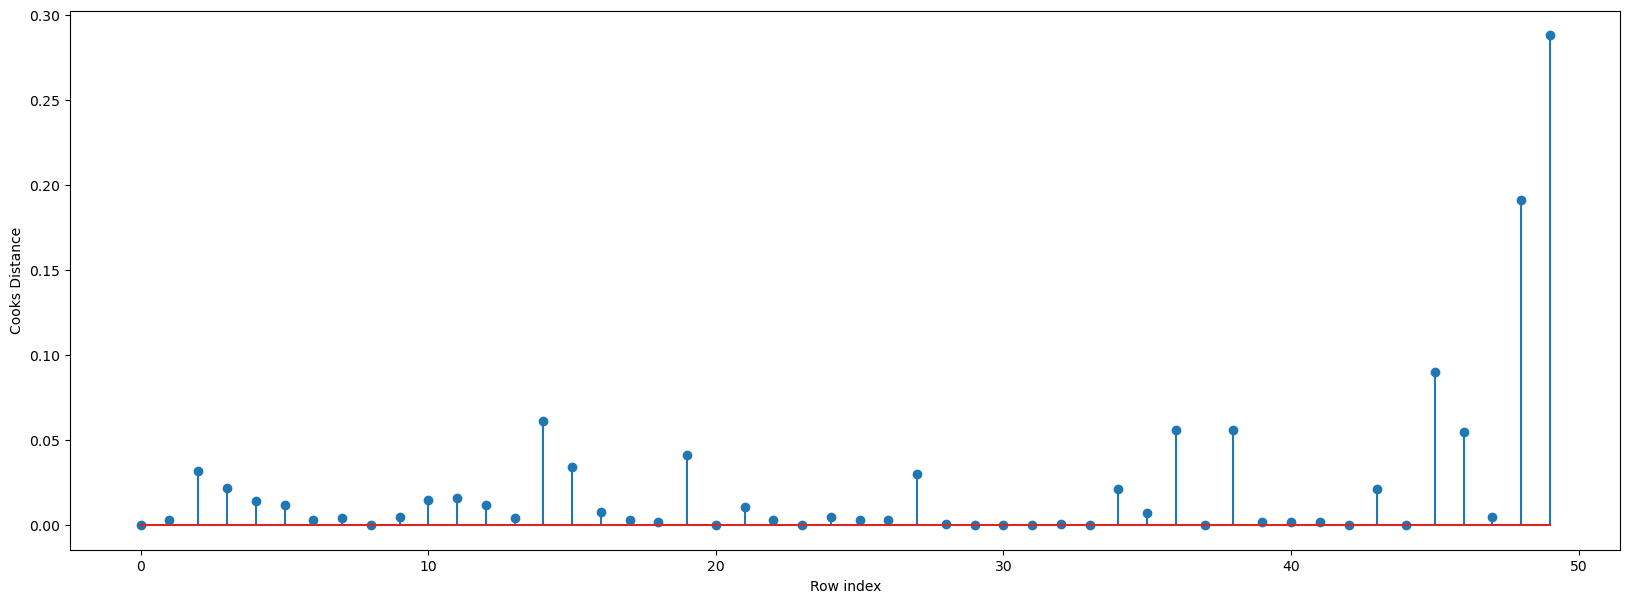

In [12]:
fig=plt.subplots(figsize=(20,7))          ##width=20 height=7 @fig
plt.stem(np.arange(len(Startups)), np.round(c,3)) #rounds array val to 3decimals
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

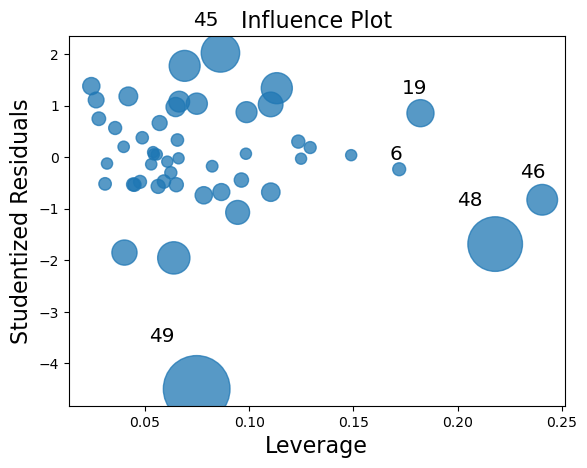

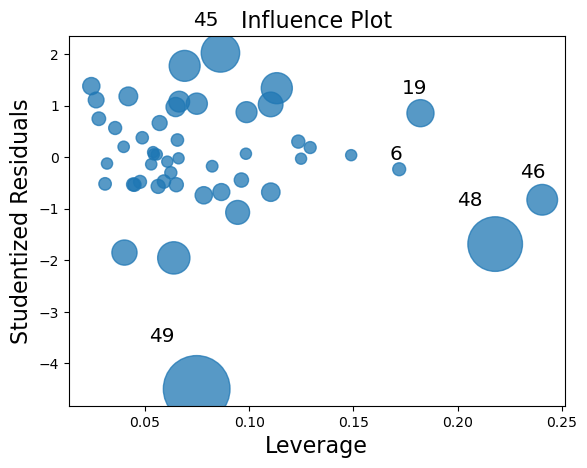

In [13]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)   

In [14]:
#display 48,49 index
Startups[Startups.index.isin([46,48,49])] 

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
46,1315.46,115816.21,297114.46,49490.75,0,1,0
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [15]:
#Dropping index 46,48,49
Startups1=Startups.drop([46,48,49], axis=0)
Startups1.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [16]:
model2=smf.ols('Profit~RnD_Spend+Marketing_Spend',data=Startups1).fit()   #building model
model2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.65e-31
Time:                        12:04:21   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
RnD_Spend           0.7439      0.037     19.902      0.000       0.669       0.819
Marketing_Spend     0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretation

In [17]:
# p-value < 0.05              Thus the model is accepted

# coefficient = 0.7439       if RnD_Spend value increased by 1, the predicted value of Proft will increase by 0.7439

# Adj. R-sqared = 0.958     The model explains 95.8% of the variance in dependent variable